In [ ]:
!unzip /content/drive/MyDrive/Helmet_NoHemet_Detection-20250224T164023Z-001.zip -d /content/drive/MyDrive/Helmet_NoHemet_Detection

Streaming output truncated to the last 5000 lines.
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/BikesHelmets170_png.rf.6d3af1c4f550348cfccd41abec9340f6.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/train525_jpg.rf.19d058a3a6689ba1839ac8d8fa83c238.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/train277_jpg.rf.b57b59ebd102c59fe5738fbe349ed4fe.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/train643_jpg.rf.f4408b3ace94b57754237102fe6b5e94.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/BikesHelmets647_png.rf.b209149e6192232e26d3bf598e6f7b80.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/train580_jpg.rf.d34b39b1d7c7140ec746b5a887018eaf.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/64_jpg.rf.39c6107fba2a504684d57bb59a664c26.txt  
  inflating: Helmet_NoHemet_Detection/Dataset/train/labels/BikesHelmets570_png.rf.add03e77a264aa8e1d9a184a7fe90607.txt  
  inflating: Helmet_No

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/Helmet_NoHemet_Detection/Dataset/

/content/Helmet_NoHemet_Detection/Dataset


In [ ]:
!ls

data.yaml	    README.roboflow.txt  test	valid	    yolov8s.pt
README.dataset.txt  runs		 train	yolo11n.pt


In [ ]:
%cd /content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=10 imgsz=640 plots=True

/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

In [ ]:
!ls /content/drive/MyDrive/Helmet_NcoHemet_Detection/Dataset/runs/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1737313613.ec0f31a001f6.6838.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


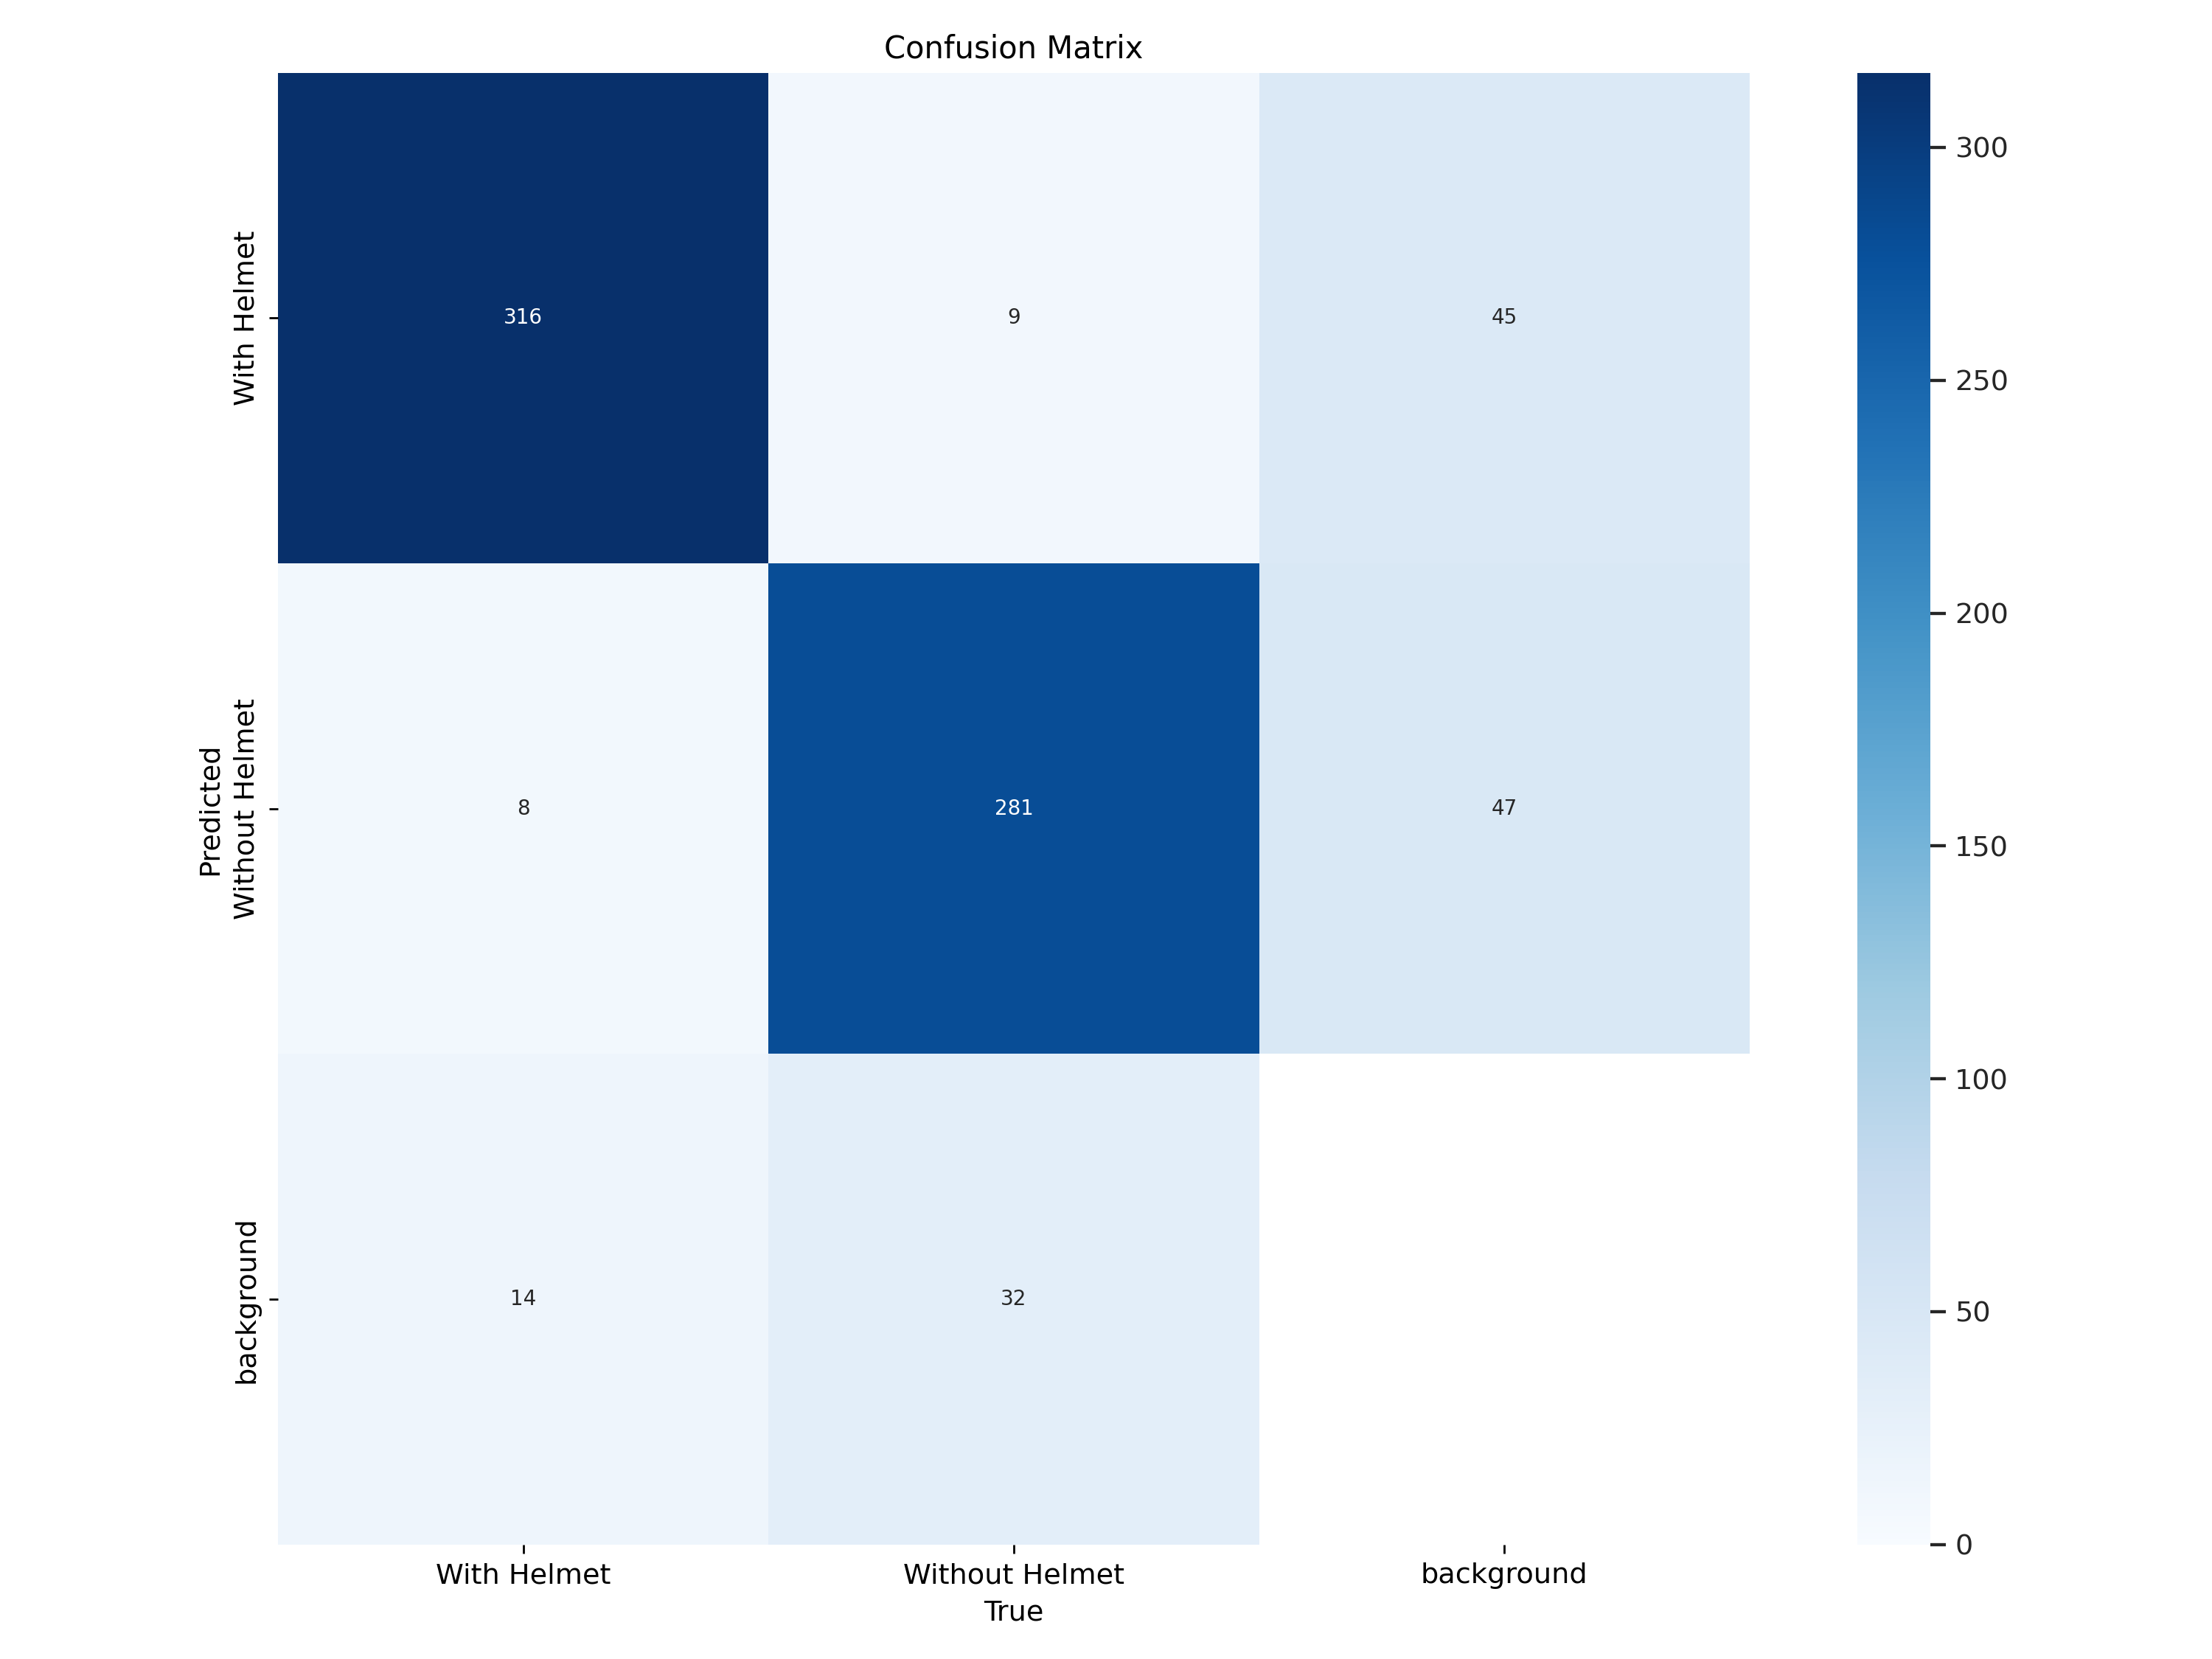

In [ ]:
Image(filename='/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/runs/detect/train/confusion_matrix.png', width=600)

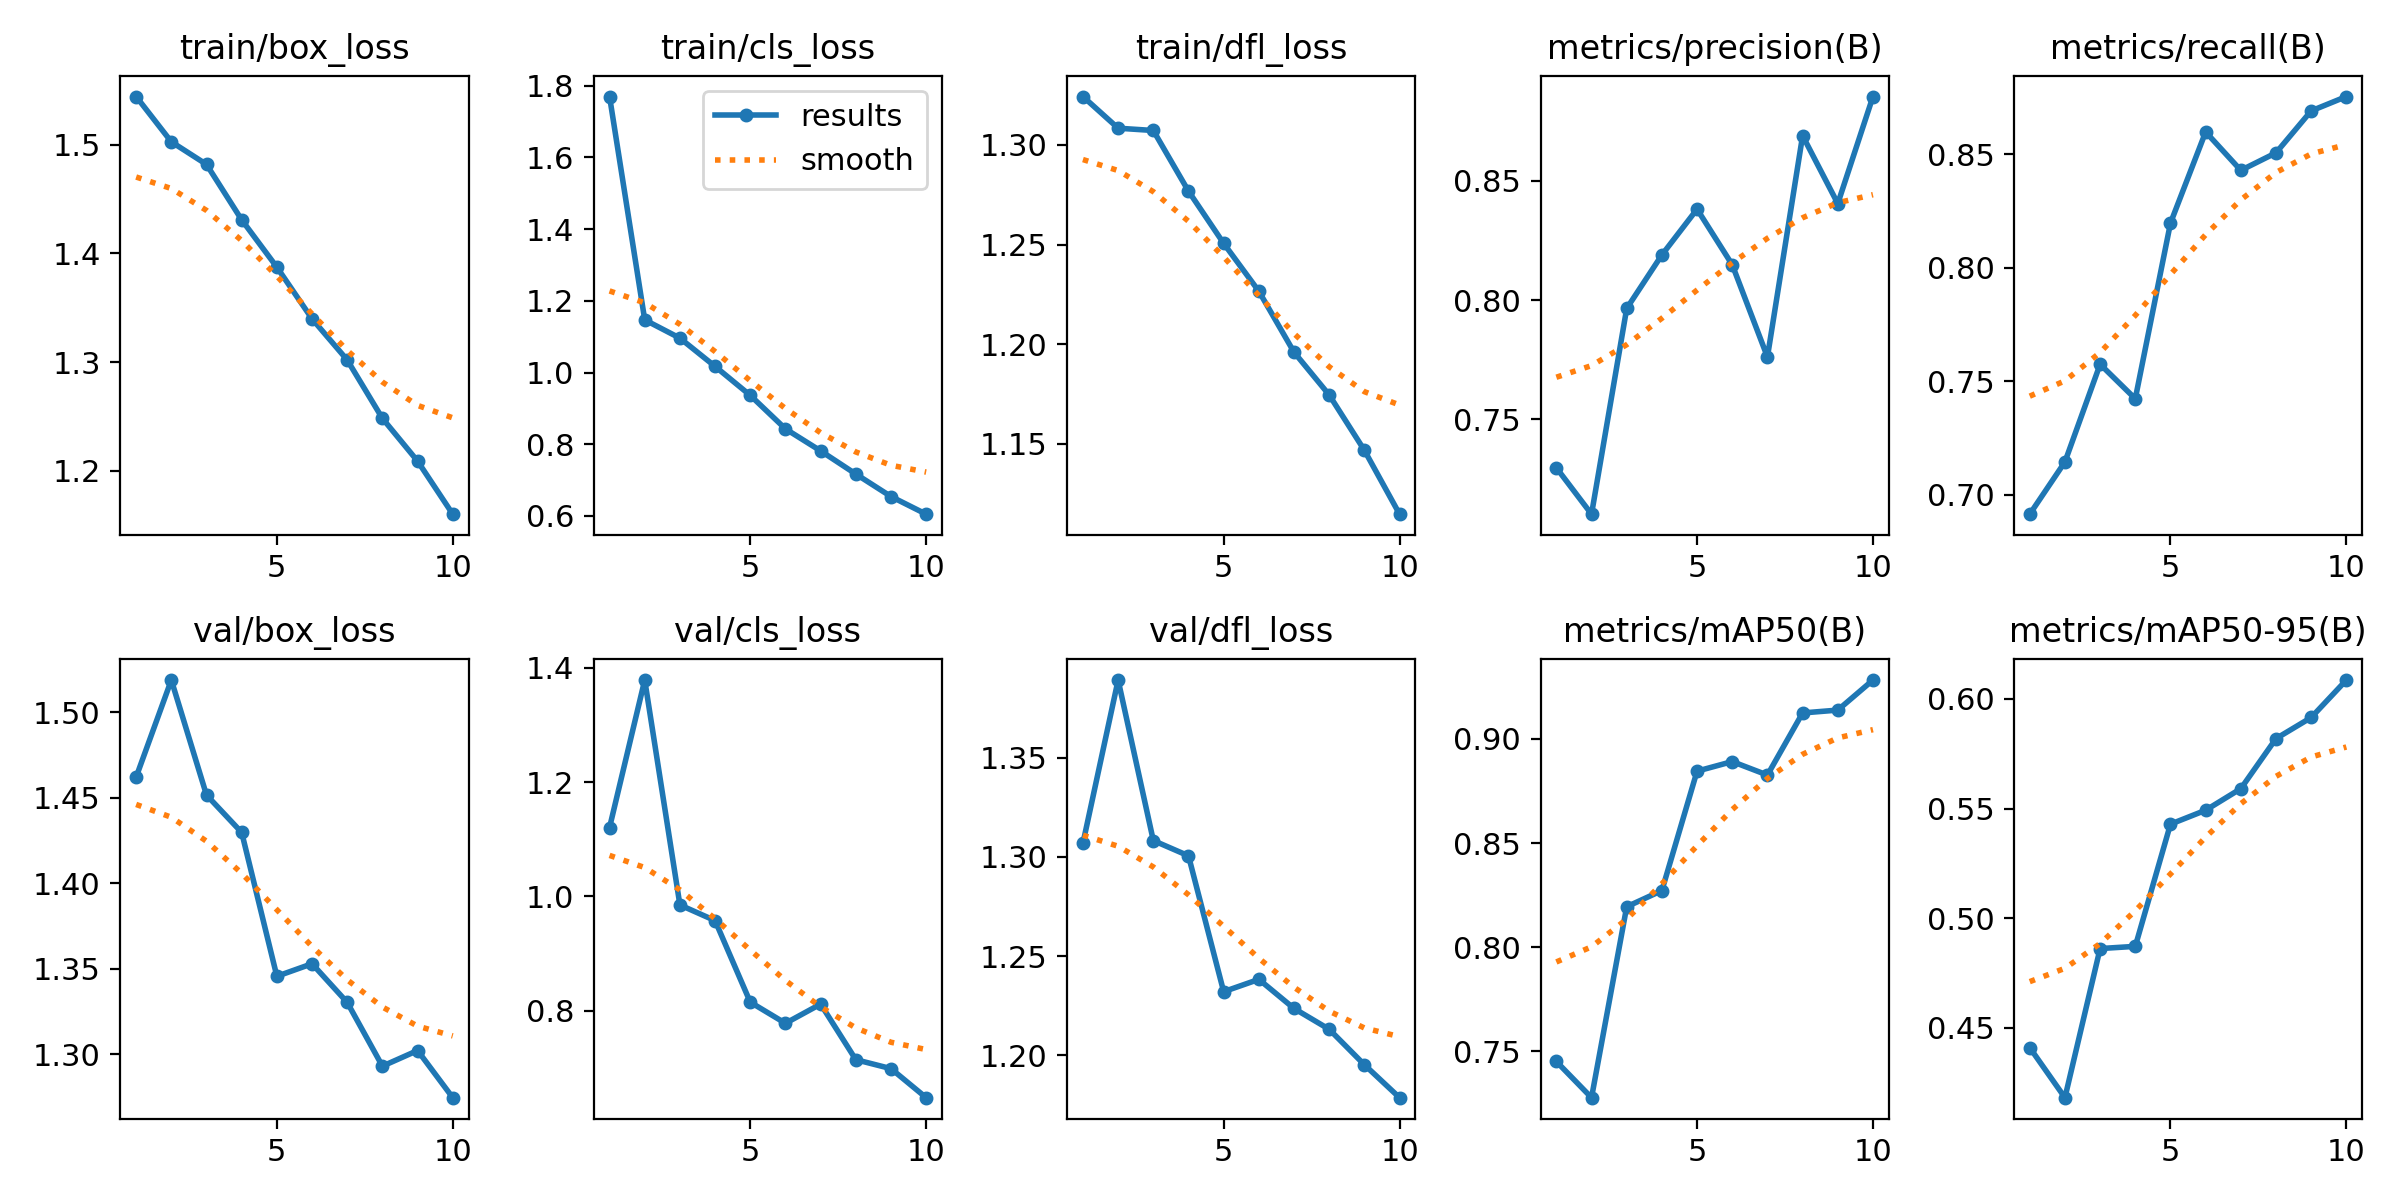

In [ ]:
Image(filename='/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/runs/detect/train/results.png', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/valid/labels.cache... 372 images, 1 backgrounds, 0 corrupt: 100% 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:07<00:00,  3.20it/s]
                   all        372        660      0.885      0.876      0.928      0.609
           With Helmet        215        338      0.905      0.928      0.962      0.678
        Without Helmet        208        322      0.866      0.823      0.895       0.54
Speed: 1.9ms preprocess, 8.7ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/runs/detect/train/weights/best.pt" conf=0.50 source=/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/test/images save=True show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/149 /content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/test/images/BikesHelmets102_png.rf.b771e83db4052e5e48900f1d9f4ee68e.jpg: 640x640 2 With Helmets, 16.2ms
image 2/149 /content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/test/images/BikesHelmets110_png.rf.108cd2cfde7b038eea459b97539f7922.jpg: 640x640 3 Without Helmets, 179.2ms
image 3/149 /content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/test/images/BikesHelmets113_png.rf.ce74cc3e9c8d03be417b6cd16444261e.jpg: 640x640 1 With Helmet, 1 Without Helmet, 16.3ms
image 4/149 /content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/test/images/BikesHelmets143_png.rf.caf0aacf12adfbfa16b20b8c3563a803.jpg: 640x640 6 Without Helmets, 16.2ms
image 5/149 /content/drive/MyDrive/Helmet_NoHemet

**NOTE:** Let's take a look at few results.

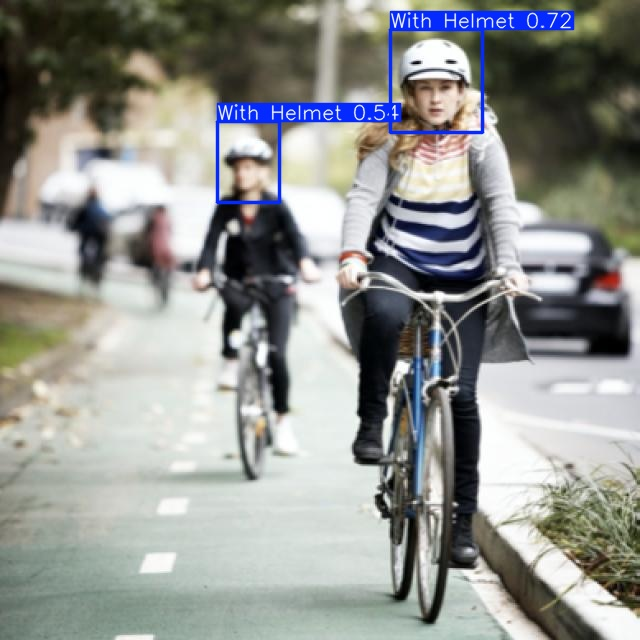

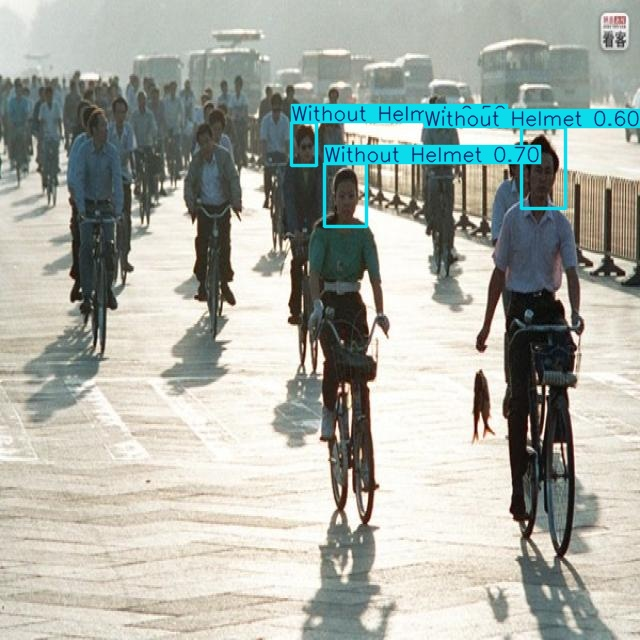

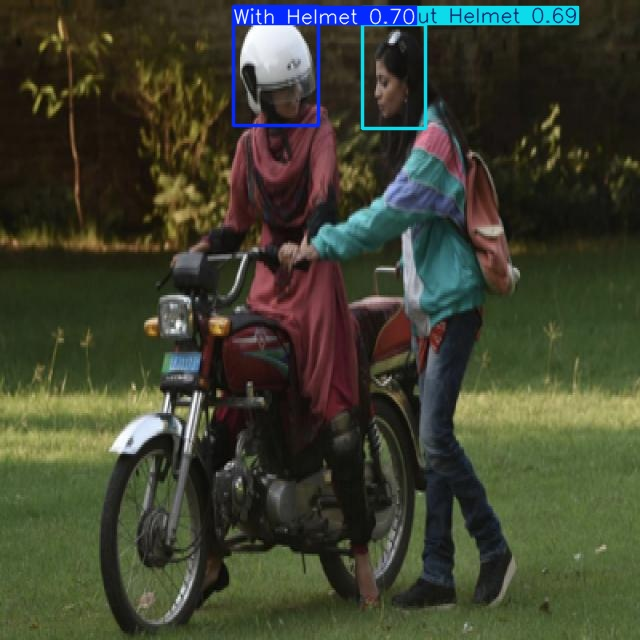

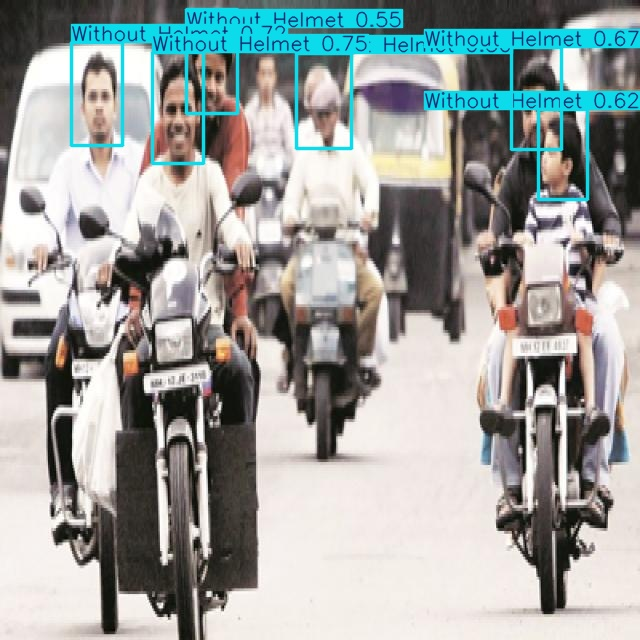

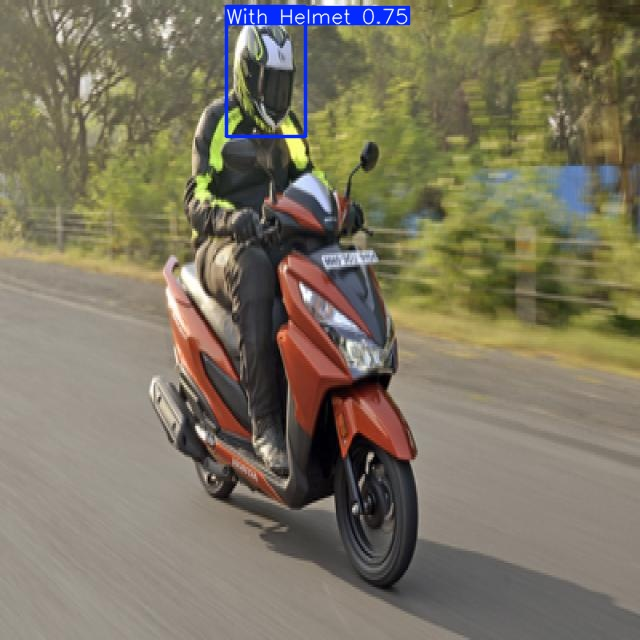

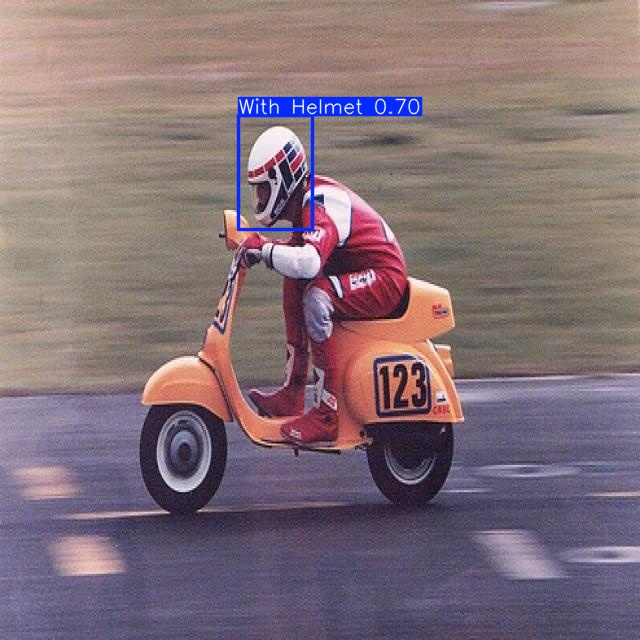

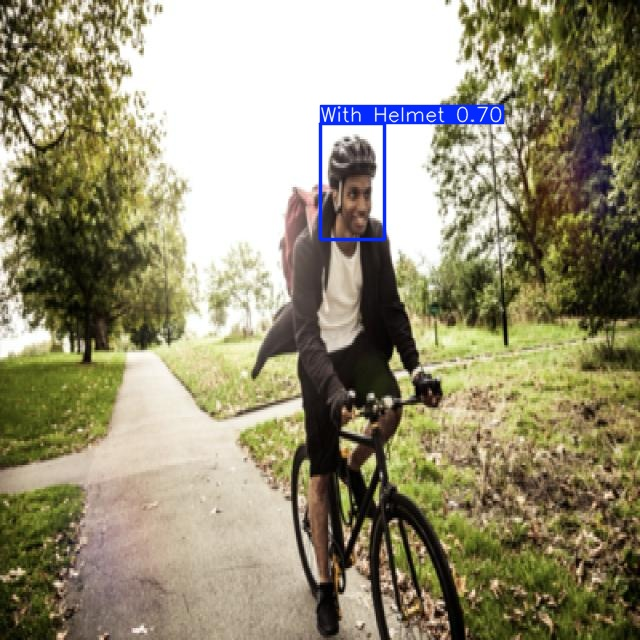

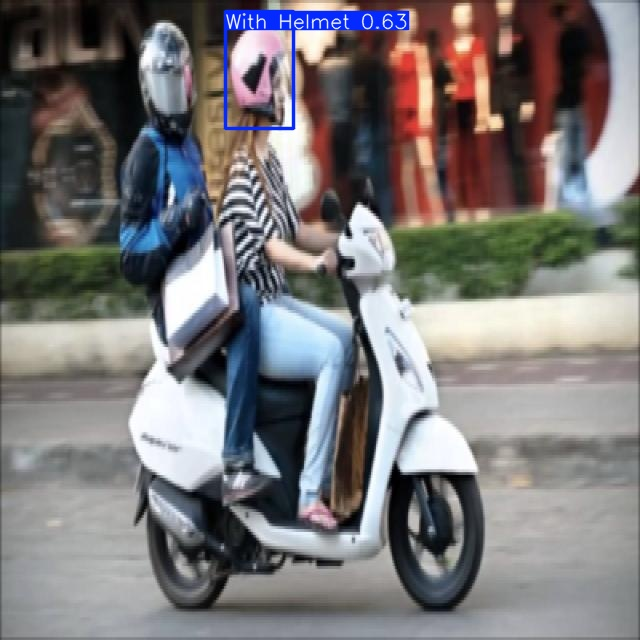

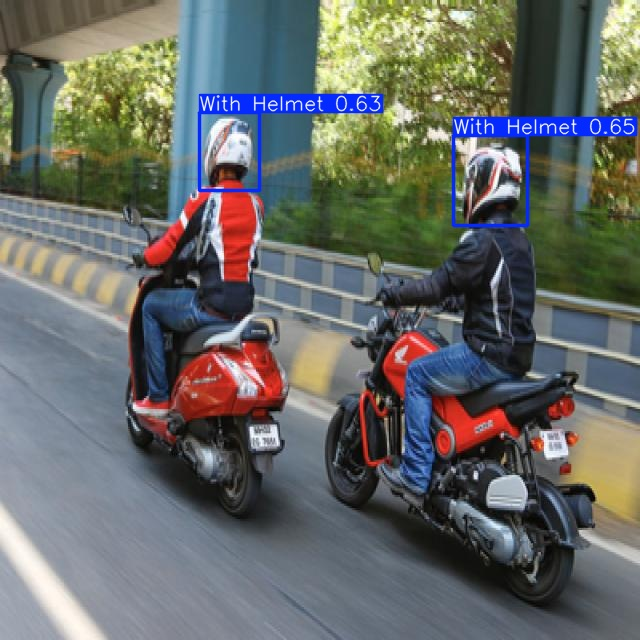

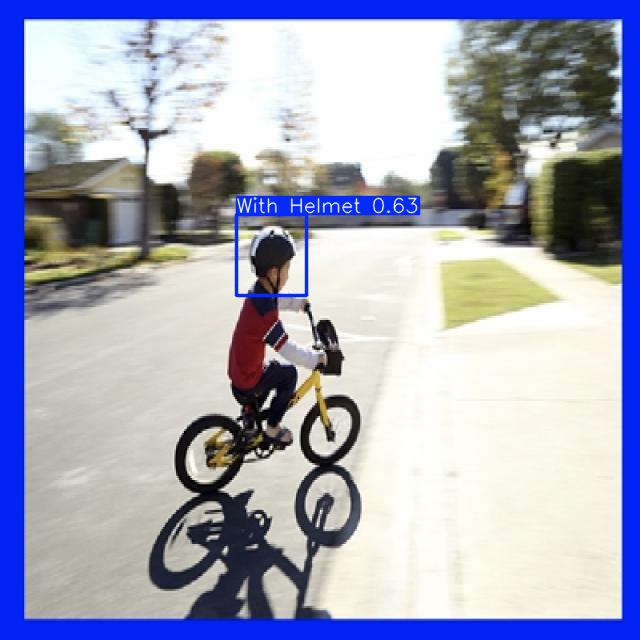

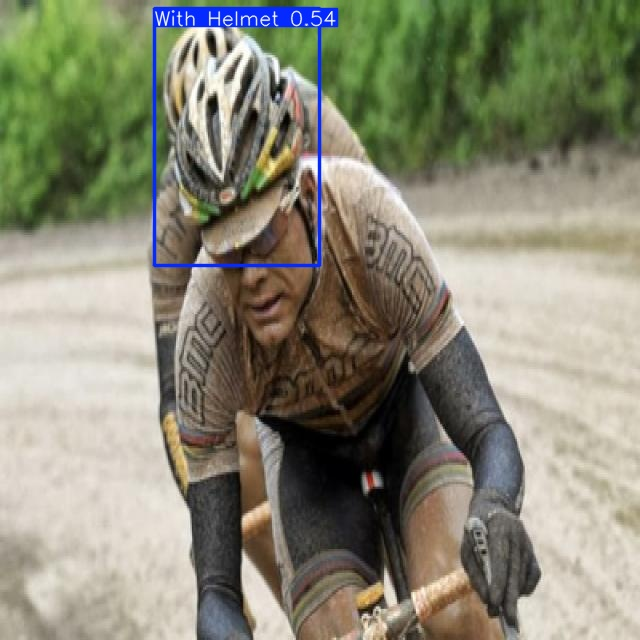

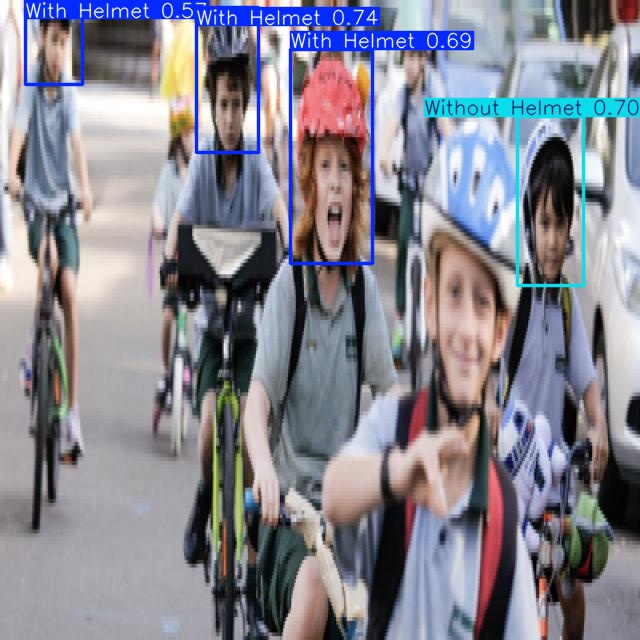

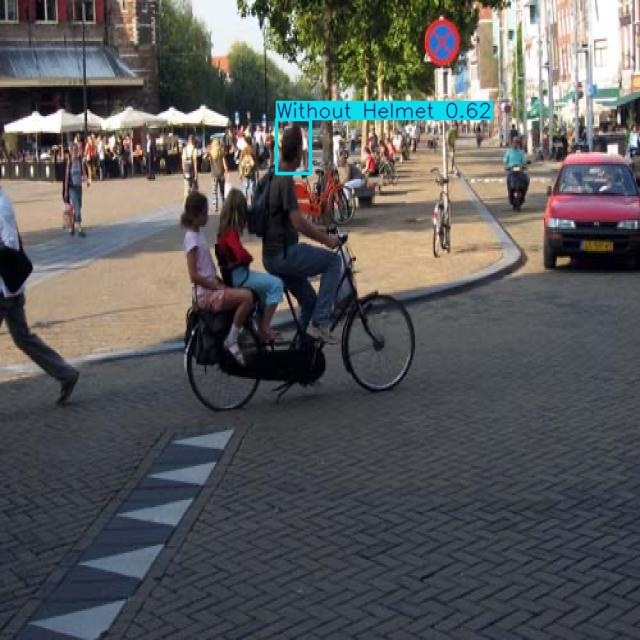

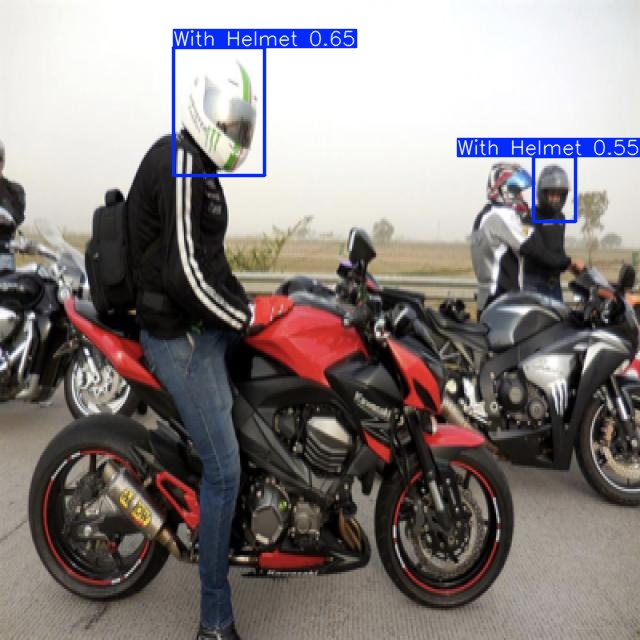

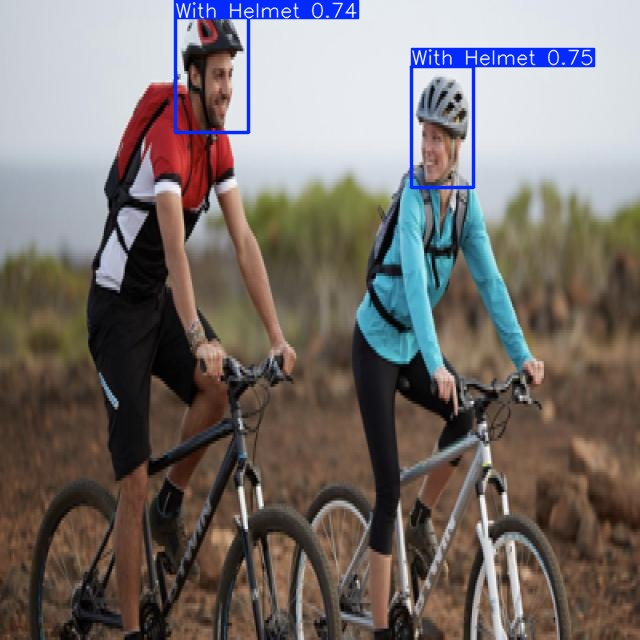

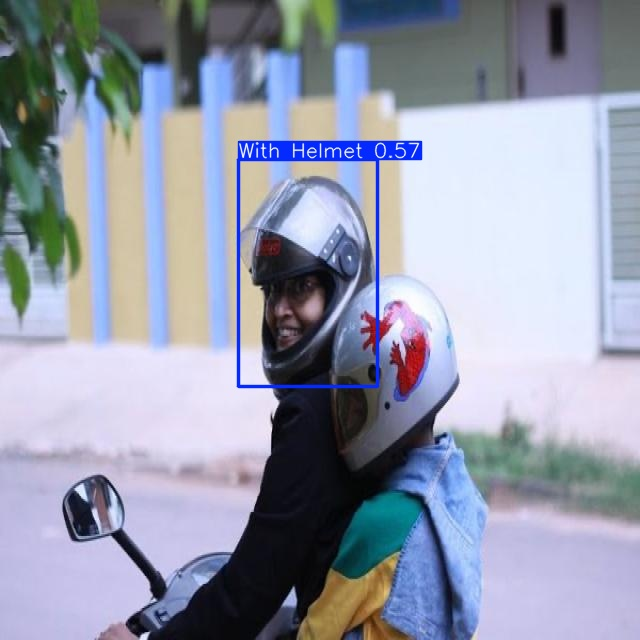

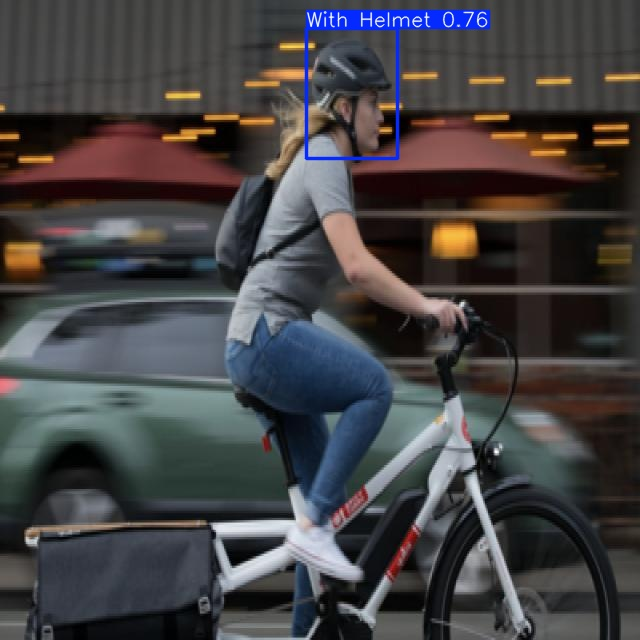

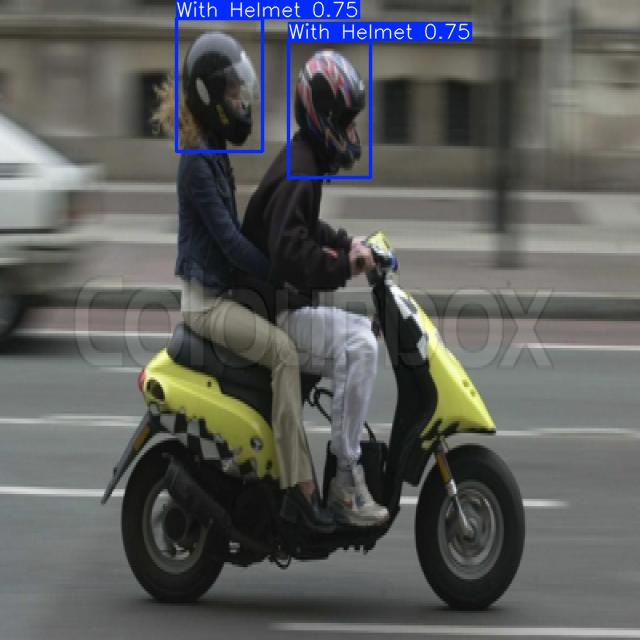

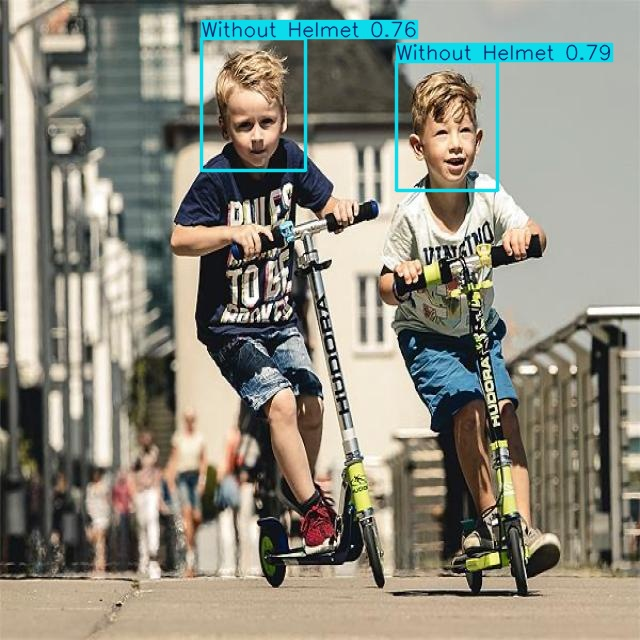

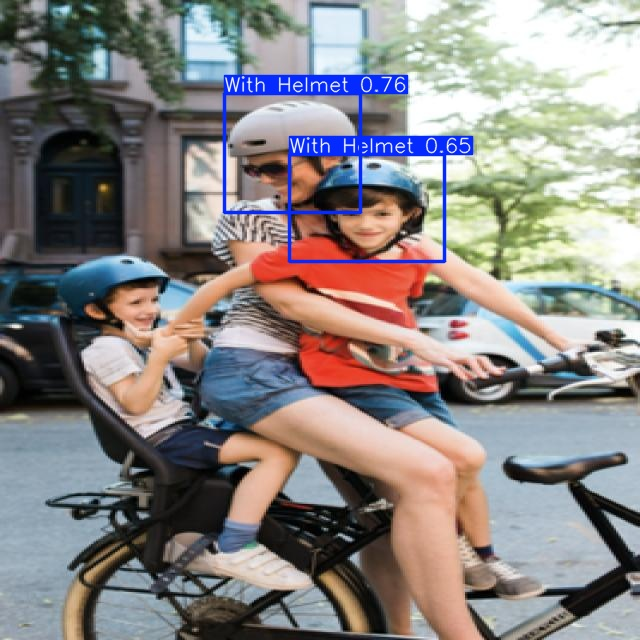

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Helmet_NoHemet_Detection/Dataset/runs/detect/predict4/*.jpg')[:20]:
      display(Image(filename=image_path, width=500))
      print("\n")